# 問題1 train_test_splitのスクラッチ

In [64]:
import numpy as np
def scratch_train_test_split(X,y,train_size=0.8,shuffle = True):
    n = X.shape[0]
    train_size = int(np.round(n * train_size))
    if train_size == 0:
        train_size = 1
    if train_size == n:
        train_size = n - 1
    
    if shuffle == True:
        shuff= np.random.permutation(np.arange(len(y)))
        #print(shuffle)
        X = X[shuff]
        y = y[shuff]
    
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    return X_train,X_test,y_train,y_test

In [58]:
#test
X= np.ones((4,4))
y =  np.ones(4)
train = X[:3]
train
test = X[3:]
test

X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size = 0.96)
print('X_train',X_train)
print('X_test',X_test)
print('y_train',y_train)
print('y_test',y_test)


X_train [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
X_test [[1. 1. 1. 1.]]
y_train [1. 1. 1.]
y_test [1.]


# 問題2 分類問題を解くコードの作成

# irisデータセット

In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
y = data.target
mask = y != 2
y = data.target[mask]
X = data.data[mask,:]

In [60]:
print(X.shape,y.shape)

(100, 4) (100,)


In [162]:
#それぞれの分類器による学習モデルと予測結果を返す。
#予測結果はトレーニングデータテストデータ両方を返す。
def train_estimate(X_train,X_test,y_train,y_test,est_list,est_names):
    pred_results = {}
    learned_ests = {}
    for est,est_name in zip(est_list,est_names):
        est = est.fit(X_train,y_train)
        y_pred_train = est.predict(X_train)
        pred_results[est_name] = []
        pred_results[est_name].append(y_pred_train)
        y_pred_test = est.predict(X_test)
        pred_results[est_name].append((y_pred_test))
        learned_ests[est_name] = est
    return learned_ests, pred_results
    

In [163]:
#学習モデルと予測結果を表示する
def printresult(learned_ests,pred_results):
    print('学習済みモデル:',learned_ests)
    print()
    for key in pred_results.keys():
        print('トレーニングデータの'+ str(key) + 'による推定値:',pred_results[key][0])
        print('テストデータの'+ str(key) + 'による推定値:',pred_results[key][1])


学習モデルと予測結果の表示

In [84]:
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y)

lr_iris = SGDClassifier(loss='log')
svc_iris = SVC()
tree_iris = DecisionTreeClassifier()
est_list = [lr_iris,svc_iris,tree_iris]
est_names = ['LogisticRegression','SVM','DecisionTree']

learned_ests, pred_results = train_estimate(X_train,X_test,
                                            y_train,y_test,est_list,est_names)

printresult(learned_ests,pred_results)

学習済みモデル: {'LogisticRegression': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), 'SVM': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), 'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# シンプルデータセット1

In [169]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

学習モデルと予測結果の表示

In [170]:
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,shuffle=False)
lr_sim1 = SGDClassifier(loss='log')
svc_sim1 = SVC()
tree_sim1 = DecisionTreeClassifier()
est_list = [lr_sim1,svc_sim1,tree_sim1]
est_names = ['LogisticRegression','SVM','DecisionTree']

learned_ests, pred_results = train_estimate(X_train,X_test,
                                            y_train,y_test,est_list,est_names)

printresult(learned_ests,pred_results)

学習済みモデル: {'LogisticRegression': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), 'SVM': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), 'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

#可視化する関数
def plot_DecisionRegion(X,y,estimator,resolution=0.02,X_test=None):
    colors = ('red','blue','lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    markers = ('s','x','o')
    X0_min,X0_max = np.min(X[:,0]-1),np.max(X[:,0]+1)
    #print(X0_min,X0_max)
    X1_min,X1_max = np.min(X[:,1])-1,np.max(X[:,1])+1
    X0 = np.arange(X0_min,X0_max,resolution)
    X1= np.arange(X1_min,X1_max,resolution)
    xx0,xx1 = np.meshgrid(X0,X1)
    Z= estimator.predict(np.array([xx0.ravel(),xx1.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx0,xx1,Z,cmap=cmap,alpha=0.3)
    

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],label=cl,
                    marker=markers[idx],edgecolor='black')
        plt.legend(loc='best')
    
    if X_test is not  None:
        plt.scatter(X_test[:,0],X_test[:,1],color='',edgecolor='black',
                   alpha=1.0,linewidth=1,marker='o',s=100,label='test set')
    


In [172]:
#まとめて可視化する関数
def allplot(X,y,X_test,est_names,learned_ests):
    plt.figure(1,figsize=(10,len(est_names)*10))
    count = 1
    for est, name in zip(learned_ests.values(),est_names):
        plt.subplot(len(est_names),1,count)
        plot_DecisionRegion(X,y,est,X_test =X_test)
        plt.title(name + ' plot')
        plt.xlabel('x0')
        plt.ylabel('x1')
        count +=1

可視化

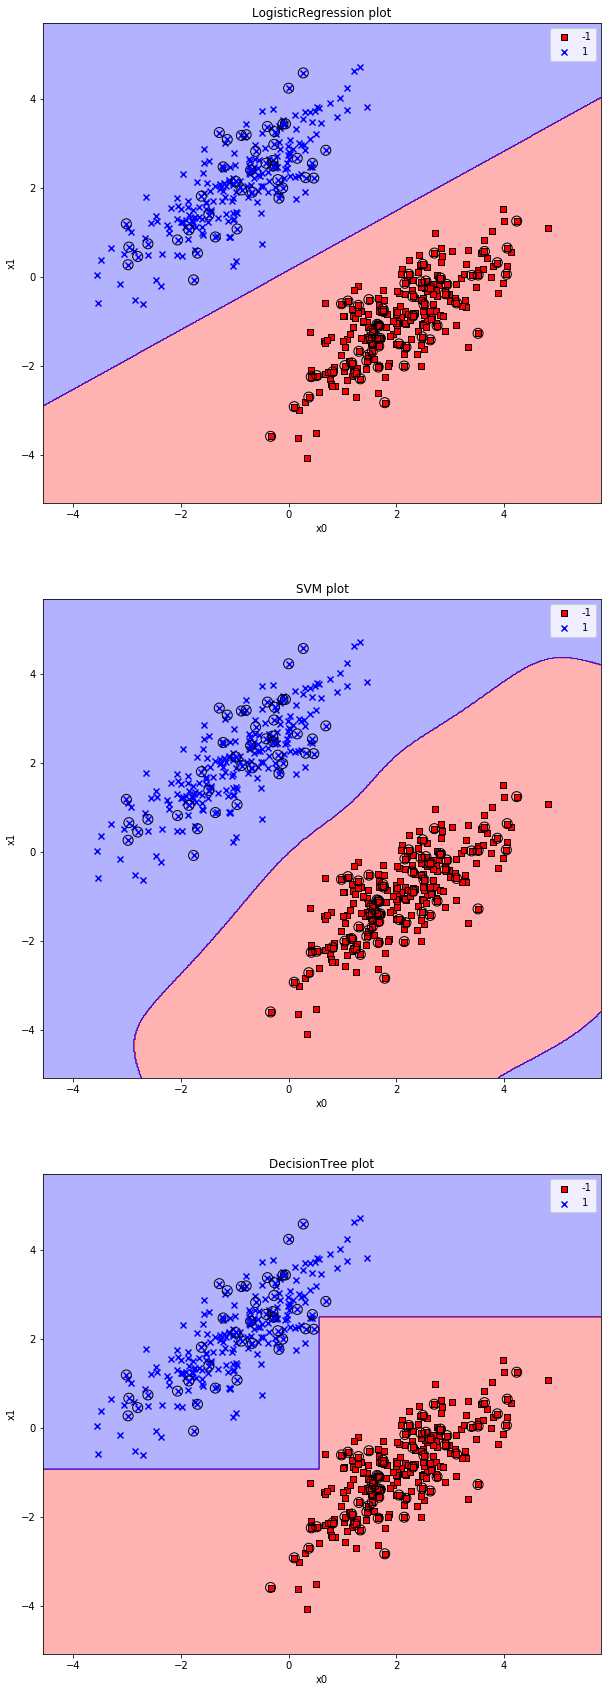

In [173]:
allplot(X,y,X_test,est_names,learned_ests)

# シンプルデータセット2

In [174]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

学習モデルと予測結果の表示

In [175]:
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,shuffle=True)
lr_sim2 = SGDClassifier(loss='log')
svc_sim2 = SVC()
tree_sim2 = DecisionTreeClassifier()
est_list = [lr_sim2,svc_sim2,tree_sim2]
est_names = ['LogisticRegression','SVM','DecisionTree']

learned_ests, pred_results = train_estimate(X_train,X_test,
                                            y_train,y_test,est_list,est_names)

printresult(learned_ests,pred_results)

学習済みモデル: {'LogisticRegression': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), 'SVM': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), 'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


可視化

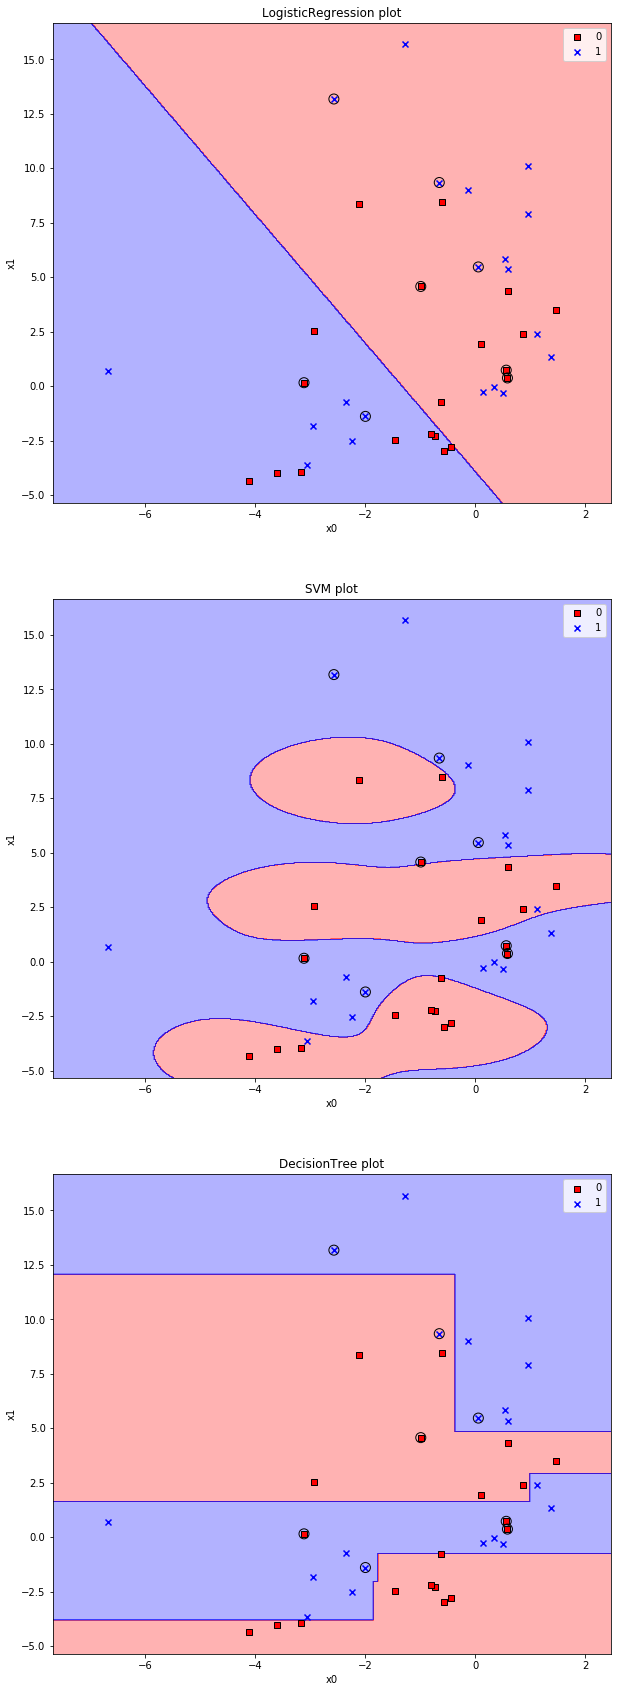

In [176]:
allplot(X,y,X_test,est_names,learned_ests)

# 問題3 回帰問題を解くコードの作成

In [177]:
from sklearn.linear_model import SGDRegressor
kaiki_df = pd.read_csv('../train.csv')
kaiki_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [242]:
df_dim2 = kaiki_df.loc[:,['GrLivArea','YearBuilt','SalePrice']]
df_dim2.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [268]:
#可視化


from mpl_toolkits.mplot3d import Axes3D

def plot_DecisionRegion_3d(df,classifier):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(1,1,1,projection='3d')
    ax.plot(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],linestyle='None',marker='o',color='blue')
    #print('iloc0')
    #print(df.iloc[:,0])
    #print('iloic1')
    #print(df.iloc[:,1])
    #print('df.iloc2')
    #print(df.iloc[:,2])
    
    X0_max = np.max(np.array(df.iloc[:,0]))
    print('X0_max',X0_max)
    X0_min = np.min(np.array(df.iloc[:,0]))
    X1_max = np.max(np.array(df.iloc[:,1]))
    print('X1_max',X1_max)
    X1_min = np.min(np.array(df.iloc[:,1]))
    
    X0 = np.linspace(X0_min,X0_max,100)
    X1 = np.linspace(X1_min,X1_max,100)
    xn = len(X0)
    xx0,xx1 = np.meshgrid(X0,X1)
    Z= classifier.predict(np.array([xx0.ravel(),xx1.ravel()]).T)
    Z = Z.reshape(xn,xn)
    ax.plot_surface(xx0,xx1,Z,color='orange')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    z_min = np.min(Z) -1
    print('z_min',z_min)
    z_max = np.max(Z) + 1
    print('z_max',z_max)
    ax.set_zlim(z_min,z_max)
    #plt.zlabel(df.columns[2])
    ax.view_init()

X0_max 5642
X1_max 2010
z_min 59753120110168.95
z_max 5275821044630795.0


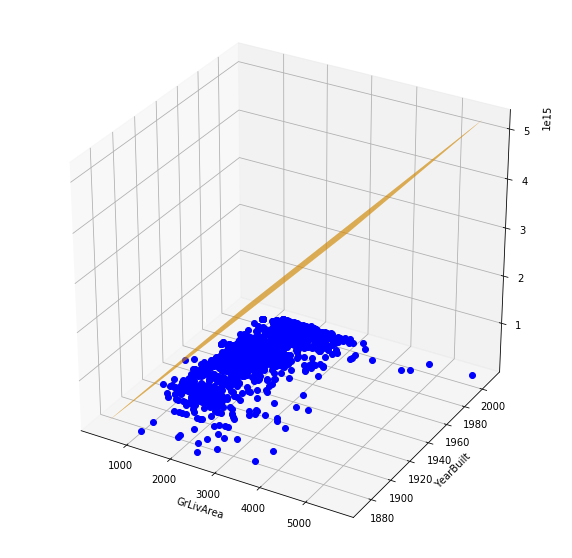

In [270]:
lr_kaiki = SGDRegressor()
lr_kaiki = lr_kaiki.fit(df_dim2.iloc[:,:-1].values,df_dim2.loc[:,'SalePrice'].values)
plot_DecisionRegion_3d(df_dim2,lr_kaiki)

明らかにおかしいグラフができてしまっている。

In [241]:
df_dim2
np.max(df_dim2.values, axis=0)

array([  5642,   2010, 755000])

In [251]:
df_dim2[df_dim2.iloc[:,0]==5642]

,GrLivArea,YearBuilt,SalePrice
1298,5642,2008,160000


In [274]:
df_dim2.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


# データを標準化して再度プロット

In [259]:
from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_standard = scr.fit_transform(df_dim2.iloc[:,:-1].values)
df_standard = pd.DataFrame(data=X_standard)
df_standard.columns = ['GrLivArea','YearBuilt']
df_standard['target'] = df_dim2.iloc[:,2]
df_standard.head()

,GrLivArea,YearBuilt,target
0,0.370333,1.050994,208500
1,-0.482512,0.156734,181500
2,0.515013,0.984752,223500
3,0.383659,-1.863632,140000
4,1.299326,0.951632,250000


In [275]:
df_standard.describe()

,GrLivArea,YearBuilt,target
count,1.460000e+03,1.460000e+03,1460.000000
mean,-1.446332e-16,1.032983e-15,180921.195890
std,1.000343e+00,1.000343e+00,79442.502883
min,-2.249120e+00,-3.287824e+00,34900.000000
25%,-7.347485e-01,-5.719226e-01,129975.000000
50%,-9.797004e-02,5.737148e-02,163000.000000
75%,4.974036e-01,9.516316e-01,214000.000000
max,7.855574e+00,1.282839e+00,755000.000000


X0_max 7.855574356961303
X1_max 1.2828389943341165
z_min -40477.38585164619
z_max 626980.3884886152


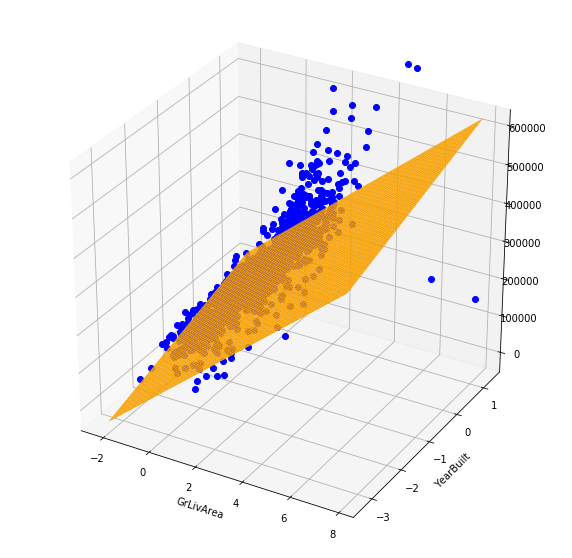

In [272]:
lr_kaiki_standard = lr_kaiki.fit(df_standard.iloc[:,:-1].values,
                                 df_standard.loc[:,'target'].values)
plot_DecisionRegion_3d(df_standard,lr_kaiki_standard)

上手くフィットした